In [1]:
import numpy as np
import tensorflow as tf
import time
from skimage.draw import line_aa
import scipy.misc
import pylab as plt
import cv2
from PIL import Image
from PIL import ImageDraw
from IPython import display
from keras.models import Sequential
from keras.layers import Dense, Activation

%matplotlib inline

Using TensorFlow backend.


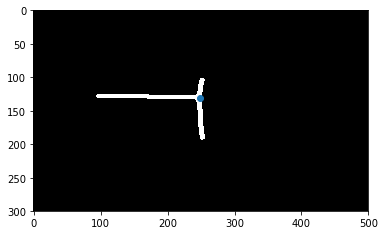

In [2]:
def GenerateData(size = 1):

    out_image = []
    out_p = []
    
    for _ in range(size):

        img = Image.new('L', (500,300), 0)  
        draw = ImageDraw.Draw(img)

        cx,cy=150,250
        sx,sy  = 20,20
        ay,ax = np.random.normal()*sx+cx, np.random.normal()*sy+cy
        ly,lx = 20,20
        bx,by = (np.random.normal()+1.5)*lx, (np.random.normal()+1.5)*ly
        cx,cy = (np.random.normal()+1.5)*lx, -(np.random.normal()+1.5)*ly

        dx,dy = np.random.normal()*5-150, np.random.normal()*2

        draw.line([(int(ax), int(ay)),(int(bx+ax), int(by+ay))], fill=255, width=5)
        draw.line([(int(ax), int(ay)),(int(cx+ax), int(cy+ay))], fill=255, width=5)
        draw.line([(int(ax), int(ay)),(int(dx+ax), int(dy+ay))], fill=255, width=5)

        image = np.asarray(img)
        image = cv2.dilate(image, None, iterations=1)
        image = cv2.blur(image,(5,5))
        ret,image = cv2.threshold(image,127,255,0)
        
        #print image[:,:,None]
        
        out_image.append(image[:,:,None])
        out_p.append([ax,ay])
        
    return np.array(out_image), np.array(out_p)

image,p = GenerateData()
    
plt.imshow(image[0][:,:,0], cmap='gray');
plt.scatter(*p[0])

In [4]:
images,ps = GenerateData(1000)

In [ ]:
model = Sequential()
model.add(Dense(units=64, input_dim=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))